In [61]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import imutils
import time
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import glob
import shutil

In [6]:
features = []
labels = []

In [7]:
Path = r"E:\MaskDetection\dataset"
Binary_class = ["with_mask", "without_mask"]

In [11]:
for category in Binary_class:
    path = os.path.join(Path, category)
    for img in os.listdir(path):
    	image_path = os.path.join(path, img)
    	image = load_img(image_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	features.append(image)
    	labels.append(category)


c:\program files\python37\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


<h1> To Label the Data </h1>

In [5]:
BinaryLabel = LabelBinarizer()
labels = BinaryLabel.fit_transform(labels)
labels = to_categorical(labels)


In [6]:
features = np.array(features, dtype="float32")
labels = np.array(labels)

<h1> Splitting the data into testing and training data ratio 80:20 </h1>

In [7]:
(trainX, testX, trainY, testY) = train_test_split(features, labels,test_size=0.20, stratify=labels, random_state=32)

<h1> Augmenting the data for better performance </h1>

In [17]:
aug = ImageDataGenerator(zoom_range=0.10,rotation_range=30,horizontal_flip=True,width_shift_range=0.3,height_shift_range=0.3
                         ,shear_range=0.20)
aug = ImageDataGenerator(rescale=1./255)

<h2> using MobileNetv2 for model training </h2>

In [27]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [28]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


In [29]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [30]:
for layer in baseModel.layers:
	layer.trainable = False

In [36]:
opt = Adam(0.0001, decay=0.0001/20)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


<h2> Training the model </h2>

In [23]:
H = model.fit(
	aug.flow(trainX, trainY, batch_size=32),steps_per_epoch=len(trainX) // 32,validation_data=(testX, testY),validation_steps=len(testX) //32,epochs=20)

Epoch 1/20
95/95 [==============================] - 238s 2s/step - loss: 0.5197 - accuracy: 0.7757 - val_loss: 0.1286 - val_accuracy: 0.9883
Epoch 2/20
95/95 [==============================] - 202s 2s/step - loss: 0.1480 - accuracy: 0.9656 - val_loss: 0.0662 - val_accuracy: 0.9909
Epoch 3/20
95/95 [==============================] - 167s 2s/step - loss: 0.0980 - accuracy: 0.9779 - val_loss: 0.0530 - val_accuracy: 0.9922
Epoch 4/20
95/95 [==============================] - 162s 2s/step - loss: 0.0785 - accuracy: 0.9757 - val_loss: 0.0442 - val_accuracy: 0.9935
Epoch 5/20
95/95 [==============================] - 162s 2s/step - loss: 0.0574 - accuracy: 0.9847 - val_loss: 0.0379 - val_accuracy: 0.9922
Epoch 6/20
95/95 [==============================] - 155s 2s/step - loss: 0.0546 - accuracy: 0.9860 - val_loss: 0.0338 - val_accuracy: 0.9922
Epoch 7/20
95/95 [==============================] - 160s 2s/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0312 - val_accuracy: 0.9935
Epoch 8/20
95

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

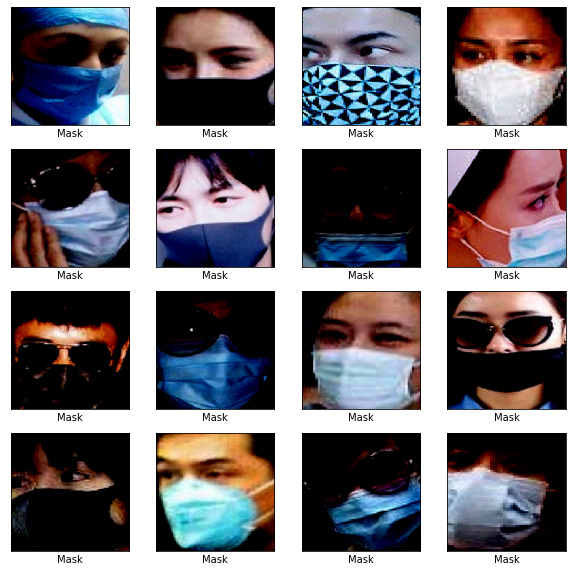

In [88]:

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(features[i+1005])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('No Mask' if labels[i][1]==1. else 'Mask')

In [37]:
prediction_id = model.predict(testX, batch_size=32)

In [45]:
model.save("H",save_format="h5")

In [37]:
saved_model = load_model(r"C:\Users\hitesh balani\h")

In [38]:
 from sklearn.metrics import confusion_matrix

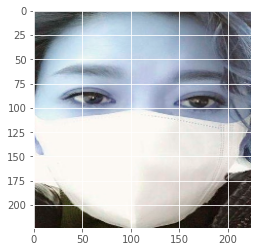

In [48]:
sample_mask_img = cv2.imread(r"E:\MaskDetection\dataset\with_mask\0_0_0 copy 6.jpg")
sample_mask_img = cv2.resize(sample_mask_img,(224,224))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,224,224,3])
sample_mask_img = sample_mask_img/255.0


In [49]:
saved_model.predict(sample_mask_img)

array([[9.9999988e-01, 7.3514634e-08]], dtype=float32)

<h2> Showing proper Results with 99% Accuracy </h2>

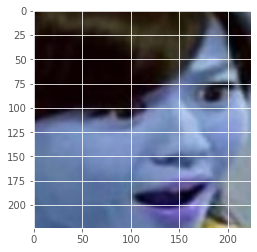

In [50]:
sample_mask_img = cv2.imread(r"E:\MaskDetection\dataset\without_mask\0_0_lijinming_0048.jpg")
sample_mask_img = cv2.resize(sample_mask_img,(224,224))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,224,224,3])
sample_mask_img = sample_mask_img/255.0

In [51]:
saved_model.predict(sample_mask_img)

array([[6.6459610e-04, 9.9933535e-01]], dtype=float32)

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}

In [66]:
%cd "E:\MaskDetection"

E:\MaskDetection


In [67]:
if os.path.isdir(r"E:\MaskDetection\validate\with_mask") is False:
    os.makedirs("validate/with_mask")
    os.makedirs("validate/without_mask")

    for c in random.sample(glob.glob(r"E:\MaskDetection\dataset\with_mask\*.jpg"),100):
        shutil.move(c,'validate/with_mask')


    for c in random.sample(glob.glob(r"E:\MaskDetection\dataset\without_mask\*.jpg"),100):
        shutil.move(c,'validate/without_mask')

In [70]:
valid_path = r"E:\MaskDetection\validate"

In [71]:
val_gen = ImageDataGenerator(rescale=1./255)

In [72]:
val_ds = val_gen.flow_from_directory(valid_path, target_size=(224,224))

Found 200 images belonging to 2 classes.


In [73]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

In [75]:
img,labels= next(val_ds)

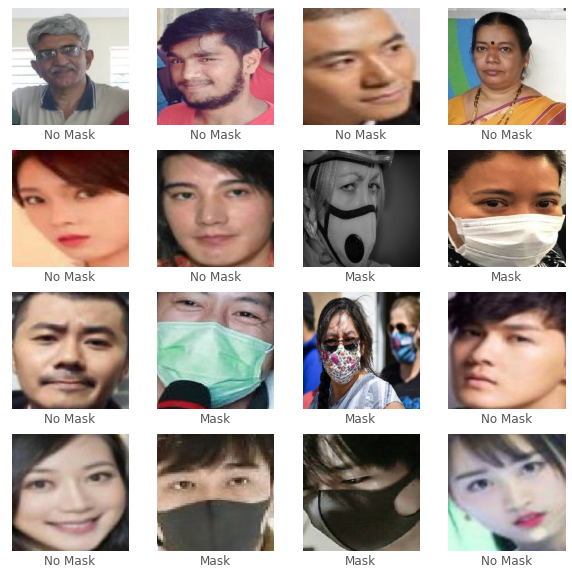

In [76]:
images, labels = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('No Mask' if labels[i][1] else 'Mask')

In [98]:

def detect_mask(frame, faceNet, maskNet):

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),(104.0, 177.0, 123.0))

    
    faceNet.setInput(blob)
    detections = faceNet.forward()
    print(detections.shape)

    faces = []
    locs = []
    preds = []
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.4:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)

            faces.append(face)
            locs.append((startX, startY, endX, endY))
    if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)

	# return a 2-tuple of the face locations and their corresponding
	# locations
    return (locs, preds)


In [99]:

prototxtPath = r"E:\MaskDetection\face_detection\deploy.prototxt"
weightsPath = r"E:\MaskDetection\face_detection\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

In [100]:
%pwd

'E:\\MaskDetection'

In [101]:
mask_detect = load_model(r"C:\Users\hitesh balani\h")

In [102]:
print("Mask Detection System Starts......")
vs = VideoStream(src=0).start()


while True:
    frame = vs.read()
    frame = imutils.resize(frame, width=500)
    (locs, preds) = detect_mask(frame, faceNet, mask_detect)

    for (box, pred) in zip(locs, preds):
        (startX, startY, endX, endY) = box
        (mask, without_mask) = pred
        
        if(mask>without_mask):
            label="MASK_DETECTED"
        else:
            label = "NO_MASK_DETECTED"
            
        if label == "MASK_DETECTED":
            color = (34,139,34)
        else:
            color = (0,0,255)


        label = "{}: {:.2f}%".format(label, max(mask, without_mask) * 100)


        cv2.putText(frame, label, (startX, startY - 10),
            5, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)


    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break


cv2.destroyAllWindows()
cv2.waitKey(1)
vs.stop()

Mask Detection System Starts......
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1